In [75]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [13]:
video_path = '/data_lids/home/andreigor/workspace/mo443/VideoSummary/video_samples/news.mpg'


In [102]:
# Create a VideoCapture object and read from input file
# If the input is the camera, pass 0 instead of the video file name
cap = cv2.VideoCapture(video_path)
# Read until video is completed
count = 0
while(cap.isOpened()):
  # Capture frame-by-frame
  ret, frame = cap.read()
  if ret == True:
    count+=1
    # Display the resulting frame
    cv2.imshow('Frame',frame)

    # Press Q on keyboard to  exit
    if cv2.waitKey(25) & 0xFF == ord('q'):
      break
    
  # Break the loop
  else: 
    break

# When everything done, release the video capture object
cap.release()

# Closes all the frames
cv2.destroyAllWindows()

[mpeg1video @ 0x55960e039cc0] ac-tex damaged at 0 10
[mpeg1video @ 0x55960e039cc0] Warning MVs not available


In [46]:
# reading the video
source = cv2.VideoCapture(video_path)
count2 = 0
# running the loop
while True:
 
    # extracting the frames
    ret, img = source.read()
    count2+=1 
    # converting to gray-scale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # displaying the video
    cv2.imshow("Live", gray)
 
    # exiting the loop
    key = cv2.waitKey(1)
    if key == ord("q"):
        break
     
# closing the window
cv2.destroyAllWindows()
source.release()

[mpeg1video @ 0x55f411113f00] ac-tex damaged at 0 10
[mpeg1video @ 0x55f411113f00] Warning MVs not available


error: OpenCV(4.5.4) ../modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [27]:
cap = cv2.VideoCapture(video_path)
ret, frame = cap.read()
ret, next_frame = cap.read()
frame, next_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY), cv2.cvtColor(next_frame, cv2.COLOR_BGR2GRAY)
print('Dimensão de uma imagem do video: ', frame.shape)

Dimensão de uma imagem do video:  (288, 384)


In [4]:
def pixel_difference(frame, next_frame):
    return abs(next_frame - frame)

# T1 = np.prod(frame.shape) * 0.1
# T2 = 100
# diff = pixel_difference(frame, next_frame)
# len(diff[diff > 100])

In [8]:
index = 0
frames = []
diffs = []
cap = cv2.VideoCapture(video_path)

# Read until video is completed
while(cap.isOpened()):
  # Capture frame-by-frame
  ret, frame = cap.read() # first frame
  ret, next_frame = cap.read() # next frame

  img_shape = frame.shape
  if ret == True:
    frame, next_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY), cv2.cvtColor(next_frame, cv2.COLOR_BGR2GRAY)

    diff = pixel_difference(frame, next_frame)
    diffs.append( len(diff[diff > 200]) * 100 / (np.prod(img_shape)))
    if len(diff[diff > 250]) * 100 / (np.prod(img_shape)) >= 16:
      frames.append(next_frame)
    index+=1    

  # Break the loop
  else: 
    break

# When everything done, release the video capture object
cap.release()

# Closes all the frames
cv2.destroyAllWindows()
print(len(frames))

0


[mpeg1video @ 0x5646526fb7c0] ac-tex damaged at 0 10
[mpeg1video @ 0x5646526fb7c0] Warning MVs not available


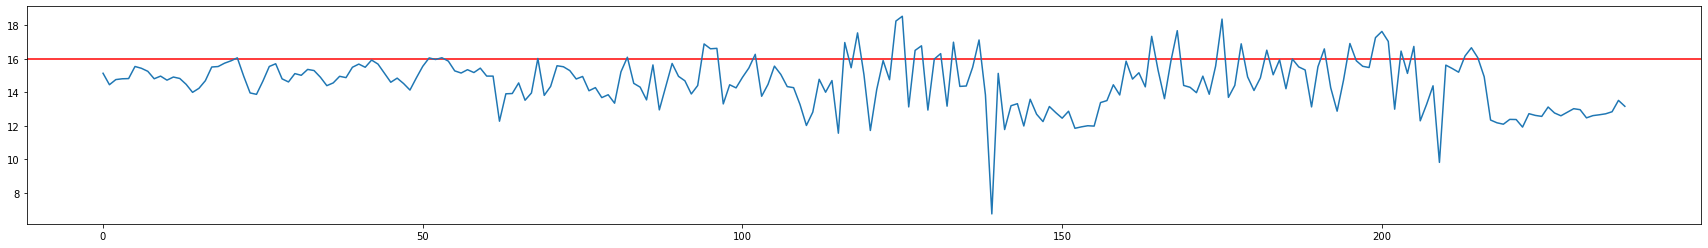

In [9]:
fig, ax = plt.subplots(figsize = (30,4))
ax.axhline(y = 16, color = 'r', linestyle = '-')
ax.plot(diffs)

In [7]:
for frame in frames:
    cv2.imshow('Frame', frame)

    
    # Press Q on keyboard to  exit
    if cv2.waitKey(1000) & 0xFF == ord('q'):
      break

cv2.destroyAllWindows()


In [54]:
cap = cv2.VideoCapture(video_path)
frameWidth = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frameHeight = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
frames = [np.zeros(shape = (frameHeight, frameWidth))]

# Read until video is completed
while(cap.isOpened()):
  # Capture frame-by-frame
  ret, frame = cap.read() # first frame
  if ret == True:
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    frames.append(frame)
  # Break the loop
  else: 
    break

# When everything done, release the video capture object
cap.release()

#
np_video = np.array(frames, dtype = np.dtype('uint8'))



[mpeg1video @ 0x55960dcae7c0] ac-tex damaged at 0 10
[mpeg1video @ 0x55960dcae7c0] Warning MVs not available


In [99]:
frames = np_video[((np.argwhere(count > 50)).ravel())]

In [101]:
for frame in frames:
    cv2.imshow('Frame', frame)

    
    # Press Q on keyboard to  exit
    if cv2.waitKey(200) & 0xFF == ord('q'):
      break

cv2.destroyAllWindows()


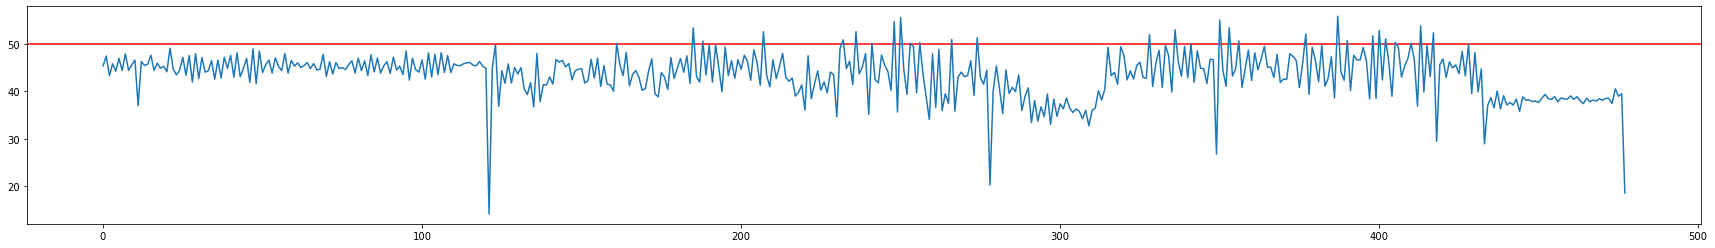

In [81]:
diffs = np.abs(np.diff(np_video, 1, axis = 0))
img_dim = np_video.shape[1] * np_video.shape[2]
count = np.count_nonzero(diffs > 200, axis = (1,2))/img_dim*100

fig, ax = plt.subplots(figsize = (30,4))
ax.axhline(y = 50, color = 'r', linestyle = '-')
ax.plot(count[1:])

In [56]:
diffs[0, :, :]

array([[10, 10, 10, ...,  0,  0,  8],
       [ 5,  5,  5, ...,  0,  1, 15],
       [ 5,  5,  5, ...,  0,  1, 16],
       ...,
       [ 9,  9,  9, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint8)

In [18]:
cap = cv2.VideoCapture('/data_lids/home/andreigor/workspace/mo443/VideoSummary/video_samples/08386.mpg')
frameCount = (cap.get(cv2.CAP_PROP_FRAME_COUNT))
frameCount

40469.0

In [9]:
np_video.shape

(18, 288, 384)

In [98]:
# cap = cv2.VideoCapture('/data_lids/home/andreigor/workspace/mo443/VideoSummary/video_samples/08386.mpg')
ret, frame = cap.read()
ret, next_frame = cap.read()
frame, next_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY), cv2.cvtColor(next_frame, cv2.COLOR_BGR2GRAY)
img_shape = frame.shape
a = pixel_difference(frame, next_frame)
len(a[a>127])/(np.prod(img_shape)) * 100

error: OpenCV(4.5.4) ../modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


176640

In [ ]:
b = np.array([0,1,2,3,4,5,6,7,8,9])
b[b> 4]

array([5, 6, 7, 8, 9])

In [ ]:
cap = cv2.VideoCapture('/data_lids/home/andreigor/workspace/mo443/VideoSummary/video_samples/08386.mpg')
cap.get(cv2.CAP_PROP_FRAME_COUNT)

40469.0